In [1]:
! pip install tensorflow keras_applications tensorflow-model-optimization tensorflow-addons matplotlib

In [2]:
import sys
import os

# Get the current working directory.
cwd = os.getcwd()

# Path to cloned repository.
repo_path = os.path.join(cwd, "tf-keras-deeplabv3p-model-set")
# Append the repository to the system path.
sys.path.append(repo_path)
from deeplabv3p.model import get_deeplabv3p_model

2025-05-06 15:16:53.123269: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-06 15:16:53.465459: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-06 15:16:54.438656: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
model = get_deeplabv3p_model("mobilenetv2", 2, (256, 256), 16, 1)
model.summary()


2025-05-06 15:16:57.245388: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:282] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-05-06 15:16:57.245461: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:134] retrieving CUDA diagnostic information for host: KittyKat
2025-05-06 15:16:57.245466: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:141] hostname: KittyKat
2025-05-06 15:16:57.245623: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:165] libcuda reported version is: 550.120.0
2025-05-06 15:16:57.245636: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:169] kernel reported version is: 550.120.0
2025-05-06 15:16:57.245638: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:248] kernel version seems to match DSO: 550.120.0


backbone layers number: 147
Freeze the first 147 layers of total 199 layers.


Model: "deeplabv3p_mobilenetv2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ image_input         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv (Conv2D)       │ (None, 128, 128,  │        864 │ image_input[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv_BN             │ (None, 128, 128,  │        128 │ Conv[0][0]        │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 128,  │          0 │ Conv_BN[0][0]     │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        288 │ re_lu[0][0]       │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 128, 128,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 128, 128,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 128, 128,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_ex… │ (None, 128, 128,  │        384 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 128, 128,  │          0 │ expanded_conv_1_… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 64, 64,    │        864 │ re_lu_1[0][0]     │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 64, 64,    │        384 │ expanded_conv_1_… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_de… │ (None, 64, 64,    │          0 │ expanded_conv_1_… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_pr… │ (None, 64, 64,    │      2,304 │ expanded_conv_1_… │
│ (Conv2D)            │ 24)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_1_pr… │ (None, 64, 64,    │         96 │ expanded_conv_1_

 Total params: 2,753,714 (10.50 MB)

 Trainable params: 903,218 (3.45 MB)

 Non-trainable params: 1,850,496 (7.06 MB)

In [4]:
!pip install scikit-learn
!pip install opencv-python

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import pandas as pd
import keras
import matplotlib as mpl
from keras import Model
from sklearn.model_selection import train_test_split
import os
import cv2 as cv
import tqdm
from sklearn.preprocessing import StandardScaler

In [6]:
def convertToTFLite(keras_model, name):
  converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
  tflmodel = converter.convert()
  file = open( name , 'wb' )
  file.write( tflmodel )

In [7]:
# convertToTFLite(model, "test.tflite")

In [8]:
from deeplabv3p.loss import SparseCategoricalCrossEntropy
from deeplabv3p.metrics import Jaccard

In [9]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossEntropy(), metrics={'pred_mask' : Jaccard})

In [10]:
!pip install kagglehub -U

In [11]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajkumarl/people-clothing-segmentation")

print("Path to dataset files:", path)

/home/cat/.env/tf_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/cat/.cache/kagglehub/datasets/rajkumarl/people-clothing-segmentation/versions/2


In [12]:
# Paths
DATASET_PATH = path
IMAGES_PATH = DATASET_PATH + "/png_images/IMAGES/"
MASKS_PATH = DATASET_PATH + "/png_masks/MASKS/"
CLASS_NAMES_PATH = DATASET_PATH + "/labels.csv"

# Sizes
IMAGE_WIDTH = 256
IMAGE_HEIGHT = 256

# Train, Test, Validation Sizes
TEST_SIZE = 0.2
VALIDATION_SIZE = 0.2

In [13]:
FILE_NAMES = []
for filename in tqdm.tqdm(os.listdir(IMAGES_PATH), "Scanning Path"):
    file_path = os.path.join(path, filename)
    if filename.endswith(".png"):
        FILE_NAMES.append(filename.split("_")[1])


FILE_NAMES.sort()
print(FILE_NAMES[:5])

Scanning Path: 100%|██████████| 1000/1000 [00:00<00:00, 839700.50it/s]

['0001.png', '0002.png', '0003.png', '0004.png', '0005.png']


In [14]:
def load_dataset(path: str, size: tuple, grey: bool):

    paths = []
    for filename in tqdm.tqdm(os.listdir(path), "Scanning Path"):
        file_path = os.path.join(path, filename)
        if filename.endswith(".png"):
            paths.append(file_path)


    paths.sort()
    images = []
    for path in tqdm.tqdm(paths, "Loading Images"):

        # Loading Image
        if grey:
          image = cv.imread(path, cv.IMREAD_GRAYSCALE)
        else:

          image = cv.imread(path, cv.IMREAD_COLOR)

        # Resize
        image = cv.resize(image, size, interpolation=cv.INTER_NEAREST)

        images.append(image)

    print(f"✅ Loaded {len(paths)} Images.")
    return np.array(images)

In [15]:
images_ds = load_dataset(IMAGES_PATH, (IMAGE_WIDTH, IMAGE_HEIGHT), False)

Loading Images: 100%|██████████| 1000/1000 [00:09<00:00, 108.97it/s]

✅ Loaded 1000 Images.


In [16]:

masks_ds = load_dataset(MASKS_PATH, (IMAGE_WIDTH, IMAGE_HEIGHT), True)
# Expaing dims
# masks_ds = np.repeat(masks_ds[:, :, :, np.newaxis], 3, axis=3)
masks_ds = masks_ds[:, :, :, np.newaxis]

Loading Images: 100%|██████████| 1000/1000 [00:00<00:00, 1266.10it/s]

✅ Loaded 1000 Images.


In [17]:
print("Images Dataset Shape", images_ds.shape)
print("Masks Dataset Shape", masks_ds.shape)

Images Dataset Shape (1000, 256, 256, 3)
Masks Dataset Shape (1000, 256, 256, 1)


In [18]:
# df_class_names = pd.read_csv(CLASS_NAMES_PATH)
# class_names = dict(df_class_names.values)
# num_classes = len(class_names)
# df_class_names.head(60)

In [19]:
def change_class(x):
    num_of_data = x.shape[0]
    x = x.reshape([num_of_data,-1])
    result = np.zeros(x.shape)
    classes = [0, 17, 19, 20, 41, 47]

    for k in range(num_of_data):
        for i, v in enumerate(x[k]):
            if v not in classes:
                result[k][i] = 1 # clothes
            else:
                result[k][i] = 0 # background

    return result

In [20]:
y_label_train = change_class(masks_ds)

y_label_train.shape

(1000, 65536)

In [21]:
y_label_train = y_label_train.reshape([-1, 256, 256])
y_label_train = y_label_train[:, :, :, np.newaxis]
print(y_label_train.shape)
# np.unique(y_label_train)

(1000, 256, 256, 1)


In [22]:

# one_hot = tf.one_hot(y_label_train, depth=2)

# reshaped = tf.reshape(one_hot, (1000, 256 * 256, 2))

In [23]:
images_ds = images_ds.astype(np.float32) / 255.0

In [24]:
def show_image(images: np.array, masks: np.array):
    """Displays images and their corresponding masks.

    Args:
        images (np.array): Array of images.
        masks (np.array): Array of masks.
    """
    # Masks_NORM = mpl.colors.Normalize(vmin=0, vmax=59)
    fig, axes = plt.subplots(images.shape[0], 2, figsize=(10, 10))

    # Handle single image case
    if images.shape[0] == 1:
        axes = [axes]  # Wrap axes in a list if only one image

    for ax, img, msk in zip(axes, images, masks):
        im1 = ax[0].imshow(img, cmap="gray")
        # im2 = ax[1].imshow(msk, cmap='gray', norm=Masks_NORM)
        im2 = ax[1].imshow(msk, cmap='gray')

        ax[0].set_title("Image")
        ax[1].set_title("Mask")

        fig.colorbar(im2, ax=ax[1], orientation='vertical')

    fig.tight_layout()

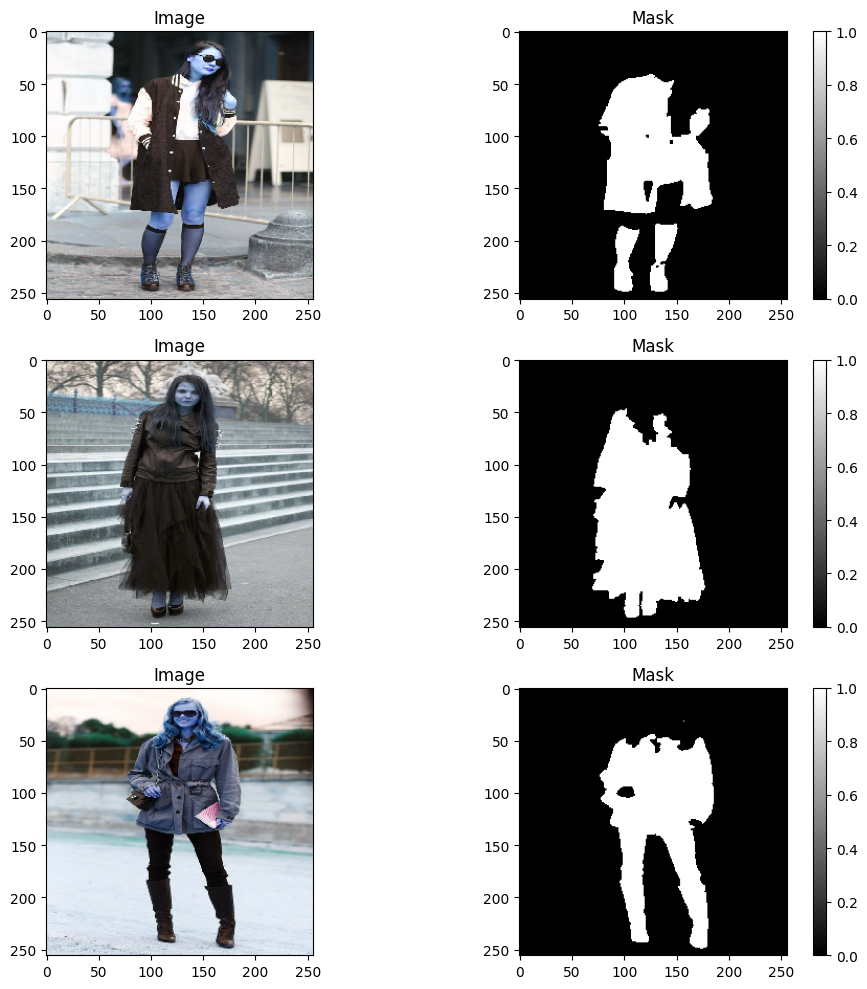

In [25]:
show_image(images_ds[:3], y_label_train[:3])

In [26]:
x_train, x_test, y_train, y_test = train_test_split(images_ds, y_label_train, test_size=TEST_SIZE, random_state=10, shuffle=True)

In [27]:
def show_predictions(epoch, dataset=None, num=50):
  if dataset:

    for image, mask in dataset.take(num):
        pred_mask = new_model.predict(image)
        plt.figure(figsize=(15, 10))
        plt.subplot(231)
        plt.title('Testing Image')
        plt.imshow(image[0], cmap='gray')
        plt.subplot(232)
        plt.title('Ground Truth')
        plt.imshow(mask[0], cmap='gray')
        plt.subplot(233)
        plt.title('Prediction on test image')
        plt.imshow(create_binary_mask(pred_mask), cmap='gray')

        plt.show()
  else:
      fig = plt.figure(figsize=(12, 12))
      fig.suptitle(f"\n Epoch: {str(epoch)}\n", fontsize=16)

      plt.subplot(331)
      plt.title('Testing Image')
      plt.imshow(x_train[num], cmap='gray')
      plt.subplot(332)
      plt.title('Ground Truth')
      plt.imshow(y_train[num], cmap='gray')
      plt.subplot(333)
      plt.title('Prediction on test image')
      plt.imshow(create_binary_mask(new_model.predict(x_train[num][tf.newaxis, ...]))[:,:,0], cmap='gray')

      plt.subplot(334)
      plt.imshow(x_train[num+16], cmap='gray')
      plt.subplot(335)
      plt.imshow(y_train[num+16], cmap='gray')
      plt.subplot(336)
      plt.imshow(create_binary_mask(new_model.predict(x_train[num+16][tf.newaxis, ...]))[:,:,0], cmap='gray')
      plt.subplot(337)
      plt.imshow(x_train[num+14], cmap='gray')
      plt.subplot(338)
      plt.imshow(y_train[num+14], cmap='gray')
      plt.subplot(339)
      plt.imshow(create_binary_mask(new_model.predict(x_train[num+14][tf.newaxis, ...]))[:,:,0], cmap='gray')

      plt.show()

In [28]:
class DisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        show_predictions(epoch)
        print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [29]:
def plot_history(hist):
  plt.figure(figsize=(12, 4))
  plt.subplot(1, 2, 1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.subplot(1, 2, 2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper left')

  plt.show()

In [30]:
NUM_CLASSES = 2
def brigtness(img, mask):
    # adjust brigtness of image, don't alter in mask
    img = tf.image.adjust_brightness(img, 0.1)
    return img, mask

def hue(img, mask):
    # adjust hue of image, don't alter in mask
    img = tf.image.adjust_hue(img, -0.1)
    return img, mask

def crop(img, mask):
    # crop both image and mask identically
    img = tf.image.central_crop(img, 0.7)
    mask = tf.image.central_crop(mask, 0.7)
    img = tf.image.resize(img, (256, 256))
    mask = tf.image.resize(mask, (256, 256))
    mask = tf.cast(mask, tf.uint8)
    return img, mask

def flip_horizontal(img, mask):
    # flip both image and mask identically
    img = tf.image.flip_left_right(img)
    mask = tf.image.flip_left_right(mask)
    return img, mask

def flip_vertical(img, mask):
    # flip both image and mask identically
    img = tf.image.flip_up_down(img)
    mask = tf.image.flip_up_down(mask)
    return img, mask

def rotate(img, mask):
    # rotate both image and mask identically
    img = tf.image.rot90(img)
    mask = tf.image.rot90(mask)
    return img, mask

def one_hot_encode_mask(img, mask):
    # mask: shape (256, 256, 1) or (256, 256)
    mask = tf.squeeze(mask, axis=-1) if tf.rank(mask) == 3 else mask  # (256, 256)
    mask = tf.one_hot(mask, NUM_CLASSES)  # (256, 256, NUM_CLASSES)
    mask = tf.reshape(mask, (-1, NUM_CLASSES))  # Flatten to (65536, NUM_CLASSES)
    return img, mask

In [31]:
def preprocessing_data(train_X, test_X, train_y, test_y, BATCH_SIZE=64, BUFFER_SIZE=1000):
    train_X = tf.data.Dataset.from_tensor_slices(train_X.copy())
    test_X = tf.data.Dataset.from_tensor_slices(test_X.copy())
    train_y = tf.data.Dataset.from_tensor_slices(train_y.copy().astype(np.uint8))
    test_y = tf.data.Dataset.from_tensor_slices(test_y.copy().astype(np.uint8))
    # zip images and masks
    train = tf.data.Dataset.zip((train_X, train_y))
    test = tf.data.Dataset.zip((test_X, test_y))
    # Perform augmentation on train data only
    a = train.map(brigtness)
    b = train.map(hue)
    c = train.map(crop)
    d = train.map(flip_horizontal)
    e = train.map(flip_vertical)
    f = train.map(rotate)
    # Concatenate every new augmented data
    for aug_data in [a, b, c, d, e, f]:
        train = train.concatenate(aug_data)

    train = train.map(one_hot_encode_mask)
    test = test.map(one_hot_encode_mask)
    # shuffle and group the train set into batches
    train = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
    # do a prefetch to optimize processing
    train = train.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
    # group the test set into batches
    test = test.batch(BATCH_SIZE)
    return train, test


In [32]:

train, test = preprocessing_data(x_train, x_test, y_train, y_test)

In [33]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [34]:
# prepare train&val data generator
# from deeplabv3p.data import SegmentationGenerator

# np.random.shuffle(FILE_NAMES)
# dataset = FILE_NAMES
# val_split = 0.2
# num_val = int(len(dataset)*val_split)
# num_train = len(dataset) - num_val

# num_classes = 2
# batch_size = 64
# input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT)

# train_generator = SegmentationGenerator(DATASET_PATH, FILE_NAMES[:num_train],
#                                         batch_size,
#                                         num_classes,
#                                         input_shape=input_shape,
#                                         weighted_type='adaptive',
#                                         is_eval=False,
#                                         ignore_index=255,
#                                         augment=True)

# valid_generator = SegmentationGenerator(DATASET_PATH, dataset[num_train:],
#                                         batch_size,
#                                         num_classes,
#                                         input_shape=input_shape,
#                                         weighted_type='adaptive',
#                                         is_eval=False,
#                                         ignore_index=255,
#                                         augment=False)

In [35]:
# # Transfer training some epochs with frozen layers first if needed, to get a stable loss.
# initial_epoch = 0
# epochs = initial_epoch + 10
# print("Transfer training stage")
# print('Train on {} samples, val on {} samples, with batch size {}, input_shape {}.'.format(num_train, num_val, batch_size, input_shape))
# model.fit(train_generator,
#                     steps_per_epoch=len(train_generator),
#                     validation_data=valid_generator,
#                     validation_steps=len(valid_generator),
#                     epochs=epochs,
#                     initial_epoch=initial_epoch,
#                     verbose=1,
#                     # workers=1,
#                     # use_multiprocessing=False,
#                     # max_queue_size=10,
#                     callbacks=[early_stopping])

In [36]:
model.compile(optimizer='adam', loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics={'pred_mask' : Jaccard})

In [37]:
hist = model.fit(
        train,
        batch_size=64,
        epochs=5,
        validation_data=test,
        callbacks=[DisplayCallback(), early_stopping]
    )

Epoch 1/5


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, None, 2), output.shape=(None, 65536, 2)